<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/ML/18BCE247_ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Urvashi Ramdasani

Roll Number - 18BCE247

Batch - D3

Aim : Linear Regression with Regularization (without using
sklearn or equivalent library) and Simple and Multiple
Linear Regression with and without regularization using
Sklearn

In [25]:
# Load the libraries

import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [2]:
# Load the Data

X, y = datasets.load_boston(return_X_y = True)
print('Shape of Independent Variables : ', X.shape)
print('Shape of Dependent Variables : ', y.shape)

Shape of Independent Variables :  (506, 13)
Shape of Dependent Variables :  (506,)


In [3]:
# Data Preprocessing

X_train_tmp = X[0:400, :]
X_train = np.ones((X_train_tmp.shape[0], X_train_tmp.shape[1] + 1))
X_test_tmp = X[400:506, :]
y_train = y[0:400]
y_test = y[400:506]
X_train[:, 1:] = X_train_tmp
X_test = np.ones((X_test_tmp.shape[0], X_test_tmp.shape[1] + 1))
X_test[:, 1:] = X_test_tmp

# Scale the model

scalar = StandardScaler()
scalar.fit(X_train[:, 1:])
X_train[:, 1:] = scalar.transform(X_train[:, 1:])
X_test[:, 1:] = scalar.transform(X_test[:, 1:])

In [4]:
# Implement the algorithm

theta = np.random.randn(X_train.shape[1])
theta

array([-0.17781241,  1.08103227,  0.35414639,  0.22641583,  0.77134   ,
        1.51322952, -0.56227292, -1.51915236, -0.90229805, -2.15976783,
       -0.08308202,  1.75204728, -0.37362886, -0.91965146])

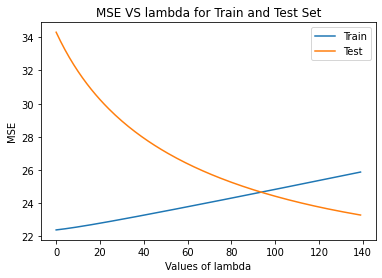

In [ ]:
# Normal Equation with Regularisation

matrix = np.zeros((X_train.shape[1], X_train.shape[1]))
for i in range(1, X_train.shape[1]):
  matrix[i, i] = 1

train_mse = []
test_mse = []

for lam in range(10, 150):
  X_tmp = np.linalg.inv(np.dot(X_train.T, X_train) + lam * matrix) # Regularisation
  x = np.dot(X_tmp, X_train.T)
  thetas = np.dot(x, y_train)
  
  y_train_predict = np.dot(X_train, thetas)
  mse_train = metrics.mean_squared_error(y_true = y_train, y_pred = y_train_predict)
  train_mse.append(mse_train)

  predict = np.dot(X_test, thetas)
  mse_test = metrics.mean_squared_error(y_true = y_test, y_pred = predict)
  test_mse.append(mse_test)

plt.plot(train_mse)
plt.plot(test_mse)
plt.title('MSE VS lambda for Train and Test Set')
plt.xlabel('Values of lambda')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'])
plt.show()

In [11]:
# Gradient Descent with Regularisation

alpha = 0.01
epochs = 1000
m = X_train.shape[0]
n = X_train.shape[1]
train_mse = []
test_mse = []

for lam in range(0, 50):
  for i in range(epochs):
    y_predicted = np.dot(X_train, theta)
    error = y_predicted - y_train
    updates = np.zeros(n)

    for j in range(n):
      updates[j] = np.sum(error * X_train.T[j])
    theta = theta * (1 - alpha * lam / m) - alpha / m * (updates)
    
  y_train_predict = np.dot(X_train, theta)
  mse_train = metrics.mean_squared_error(y_true = y_train, y_pred = y_train_predict)
  train_mse.append(mse_train)

  predict = np.dot(X_test, theta)
  mse_test = metrics.mean_squared_error(y_true = y_test, y_pred = predict)
  test_mse.append(mse_test)

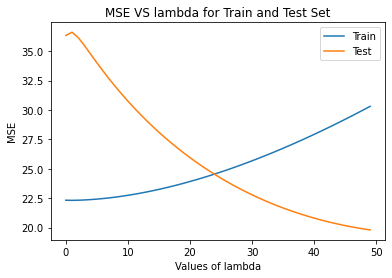

In [12]:
plt.plot(train_mse)
plt.plot(test_mse)
plt.title('MSE VS lambda for Train and Test Set')
plt.xlabel('Values of lambda')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'])
plt.show()

In [16]:
# Linear Regression using sklearn without regularization

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_predicted = regr.predict(X_test)

-0.34102440100404774


In [24]:
print('Mean Squared Error : ', metrics.mean_squared_error(y_true = y_test, y_pred = y_predicted))
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_true = y_test, y_pred = y_predicted))

Mean Squared Error :  37.89377859960133
Mean Absolute Error :  5.142232214465249


In [30]:
# Linear Regression using sklearn with regularization - Ridge

regr = linear_model.Ridge(alpha = 0.3)
regr.fit(X_train, y_train)
y_predicted = regr.predict(X_test)
print(regr.score(X_test, y_test))

-0.33622696682123543


In [31]:
print('Mean Squared Error : ', metrics.mean_squared_error(y_true = y_test, y_pred = y_predicted))
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_true = y_test, y_pred = y_predicted))

Mean Squared Error :  37.75821588453549
Mean Absolute Error :  5.13240429385621


In [32]:
# Linear Regression using sklearn with regularization - Lasso

regr = linear_model.Lasso(alpha = 0.3)
regr.fit(X_train, y_train)
y_predicted = regr.predict(X_test)
print(regr.score(X_test, y_test))

-0.18466769714633505


In [33]:
print('Mean Squared Error : ', metrics.mean_squared_error(y_true = y_test, y_pred = y_predicted))
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_true = y_test, y_pred = y_predicted))

Mean Squared Error :  33.475554506056504
Mean Absolute Error :  4.807191237590843
